In [1]:
import pandas as pd

dataset_titanic = pd.read_csv('/content/titanic-data.csv')
print(f'Número de passageiros e atributos do dataset {dataset_titanic.shape}')
dataset_titanic

Número de passageiros e atributos do dataset (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
dataset_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
dataset_titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
print(f'Percentual de dados nulos no dataset: \n{round(dataset_titanic.isnull().mean() * 100, 2)}')  

Percentual de dados nulos no dataset: 
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


Text(0, 0.5, 'Intervalo de Passagens')

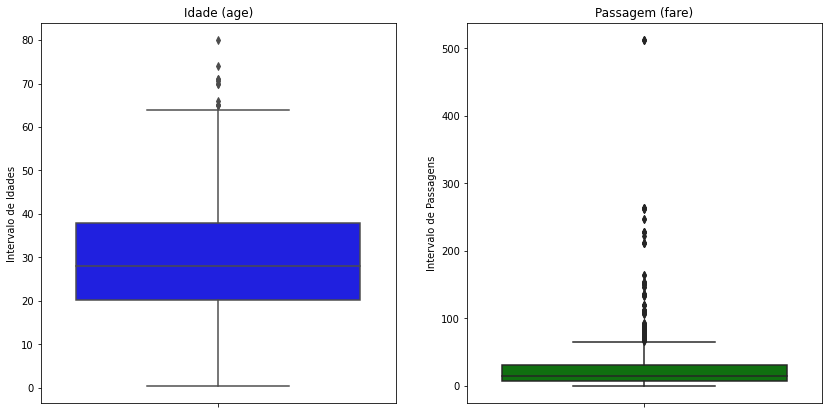

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y = 'Age', data = dataset_titanic, color =  'blue')
fig.set_title('Idade (age)')
fig.set_ylabel('Intervalo de Idades')

plt.subplot(1, 2, 2)
fig = sns.boxplot(y = 'Fare', data = dataset_titanic, color =  'green')
fig.set_title('Passagem (fare)')
fig.set_ylabel('Intervalo de Passagens')

Text(0, 0.5, 'Número de observações por preço')

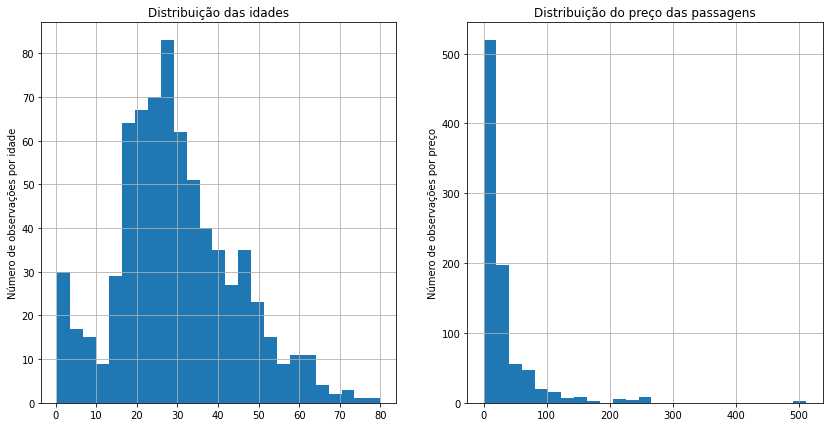

In [6]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
fig = dataset_titanic.Age.hist(bins = 25)
fig.set_title('Distribuição das idades')
fig.set_ylabel('Número de observações por idade')

plt.subplot(1, 2, 2)
fig = dataset_titanic.Fare.hist(bins = 25)
fig.set_title('Distribuição do preço das passagens')
fig.set_ylabel('Número de observações por preço')


In [7]:
quartilInferior = dataset_titanic['Age'].quantile(q = 0.25)
print(f'Quartil inferior {quartilInferior}')
quartilSuperior = dataset_titanic['Age'].quantile(q = 0.75)
print(f'Quartil superior {quartilSuperior}')

amplitude = quartilSuperior - quartilInferior
limite_maximo_moderado = quartilSuperior + 1.5 * amplitude
limite_inferior_moderado = quartilInferior - 1.5 * amplitude
print(f'limite superior moderado: {limite_maximo_moderado}')
print(f'limite inferior moderado: {limite_inferior_moderado}')

limite_maximo_extremo = quartilSuperior + 3 * amplitude
limite_inferior_extremo = quartilInferior - 3 * amplitude
print(f'limite superior extremo: {limite_maximo_extremo}')
print(f'limite inferior extremo: {limite_inferior_extremo}')

Quartil inferior 20.125
Quartil superior 38.0
limite superior moderado: 64.8125
limite inferior moderado: -6.6875
limite superior extremo: 91.625
limite inferior extremo: -33.5


In [8]:
number = dataset_titanic[dataset_titanic['Age'] > limite_maximo_moderado].count()[0]
print(f'Número de instâncias que vão ser modificadas para o limite interno do quartil superior:{number}')

import numpy as np

dataset_titanic['Age'] = np.where(dataset_titanic['Age'] >  limite_maximo_moderado,  limite_maximo_moderado, dataset_titanic['Age']) 

Número de instâncias que vão ser modificadas para o limite interno do quartil superior:11


In [9]:
quartilInferior_fare = dataset_titanic['Fare'].quantile(q = 0.25)
print(f'Quartil inferior (fare): {quartilInferior_fare}')
quartilSuperior_fare = dataset_titanic['Fare'].quantile(q = 0.75)
print(f'Quartil superior (fare): {quartilSuperior_fare}')

amplitude_fare = quartilSuperior_fare - quartilInferior_fare
limite_maximo_moderado_fare = quartilSuperior_fare + 1.5 * amplitude_fare
limite_inferior_moderado_fare = quartilInferior_fare - 1.5 * amplitude_fare
print(f'limite superior moderado (fare): {limite_maximo_moderado_fare}')
print(f'limite inferior moderado (fare): {limite_inferior_moderado_fare}')

limite_maximo_extremo_fare = quartilSuperior_fare + 3 * amplitude_fare
limite_inferior_extremo_fare = quartilInferior_fare - 3 * amplitude_fare
print(f'limite superior extremo (fare): {limite_maximo_extremo_fare}')
print(f'limite inferior extremo (fare): {limite_inferior_extremo_fare}')

Quartil inferior (fare): 7.9104
Quartil superior (fare): 31.0
limite superior moderado (fare): 65.6344
limite inferior moderado (fare): -26.724
limite superior extremo (fare): 100.2688
limite inferior extremo (fare): -61.358399999999996


In [10]:
dataset_titanic[dataset_titanic['Fare'] > 100]['Pclass'].value_counts()

1    53
Name: Pclass, dtype: int64

In [11]:
precoMedioPrimeiraClasse = dataset_titanic[(dataset_titanic['Pclass'] == 1) & (dataset_titanic['Fare'] < 100)]['Fare'].mean()
print(precoMedioPrimeiraClasse)

50.70350306748466


In [12]:
dataset_titanic['Fare'] = np.where(dataset_titanic['Fare'] > 100, np.random.randint(40, 60, 1)[0], dataset_titanic['Fare'])
print(dataset_titanic.groupby('Pclass')['Fare'].mean())

dataset_titanic['Fare'] = np.where(((dataset_titanic['Fare'] == 0) & (dataset_titanic['Pclass'] == 1)), 50, dataset_titanic['Fare'])
dataset_titanic['Fare'] = np.where(((dataset_titanic['Fare'] == 0) & (dataset_titanic['Pclass'] == 2)), 20, dataset_titanic['Fare'])
dataset_titanic['Fare'] = np.where(((dataset_titanic['Fare'] == 0) & (dataset_titanic['Pclass'] == 3)), 14, dataset_titanic['Fare'])

Pclass
1    52.493847
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Text(0, 0.5, 'Intervalo de Passagens')

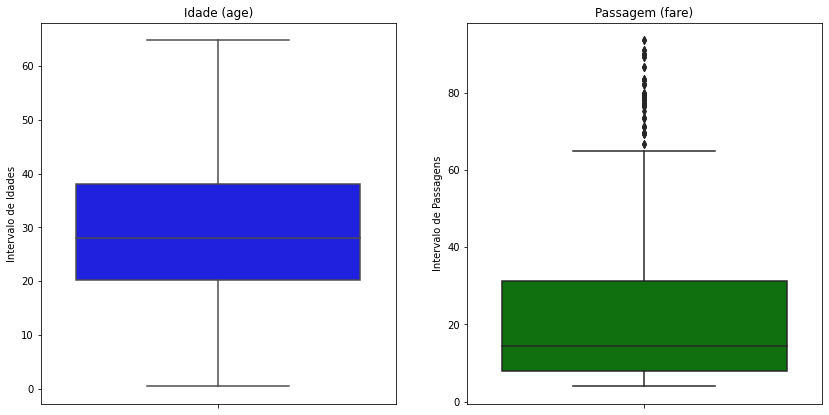

In [13]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y = 'Age', data = dataset_titanic, color =  'blue')
fig.set_title('Idade (age)')
fig.set_ylabel('Intervalo de Idades')

plt.subplot(1, 2, 2)
fig = sns.boxplot(y = 'Fare', data = dataset_titanic, color =  'green')
fig.set_title('Passagem (fare)')
fig.set_ylabel('Intervalo de Passagens')

In [14]:
print(dataset_titanic.groupby(['Pclass', 'Sex'])['Age'].mean())

Pclass  Sex   
1       female    34.611765
        male      40.953416
2       female    28.722973
        male      30.676313
3       female    21.750000
        male      26.448053
Name: Age, dtype: float64


In [15]:
dataset_titanic['Age'] = np.where(((dataset_titanic['Age'].isnull()) & (dataset_titanic['Pclass'] == 1) & (dataset_titanic['Sex'] == 'male')), 41, dataset_titanic['Age'])
dataset_titanic['Age'] = np.where(((dataset_titanic['Age'].isnull()) & (dataset_titanic['Pclass'] == 1) & (dataset_titanic['Sex'] == 'female')), 34, dataset_titanic['Age'])
dataset_titanic['Age'] = np.where(((dataset_titanic['Age'].isnull()) & (dataset_titanic['Pclass'] == 2) & (dataset_titanic['Sex'] == 'male')), 31, dataset_titanic['Age'])
dataset_titanic['Age'] = np.where(((dataset_titanic['Age'].isnull()) & (dataset_titanic['Pclass'] == 2) & (dataset_titanic['Sex'] == 'female')), 28, dataset_titanic['Age'])
dataset_titanic['Age'] = np.where(((dataset_titanic['Age'].isnull()) & (dataset_titanic['Pclass'] == 3) & (dataset_titanic['Sex'] == 'male')), 26, dataset_titanic['Age'])
dataset_titanic['Age'] = np.where(((dataset_titanic['Age'].isnull()) & (dataset_titanic['Pclass'] == 3) & (dataset_titanic['Sex'] == 'female')), 22, dataset_titanic['Age'])

In [16]:
dataset_titanic.Embarked.fillna(dataset_titanic.Embarked.mode()[0], inplace=True)

In [17]:
dataset_titanic['Cabin_temp'] = dataset_titanic['Cabin'].str[0].str.lower().str.strip()
dataset_titanic.groupby('Pclass')['Cabin_temp'].value_counts()

Pclass  Cabin_temp
1       c             59
        b             47
        d             29
        e             25
        a             15
        t              1
2       f              8
        d              4
        e              4
3       f              5
        g              4
        e              3
Name: Cabin_temp, dtype: int64

In [18]:
dataset_titanic.drop('Cabin_temp', axis = 1, inplace=True)

CabinAndClass1 = ['a', 'b', 'c', 'd', 'e']
CabinAndClass2 = ['d', 'e', 'f']
CabinAndClass3 = ['e', 'f', 'g']

dataset_titanic['Cabin'] = dataset_titanic['Cabin'].str[0].str.lower().str.strip()

dataset_titanic['Cabin'] = np.where((dataset_titanic['Cabin'].isnull()) & (dataset_titanic['Pclass'] == 1), np.random.choice(CabinAndClass1, size = 1)[0], dataset_titanic['Cabin'])
dataset_titanic['Cabin'] = np.where((dataset_titanic['Cabin'].isnull()) & (dataset_titanic['Pclass'] == 2), np.random.choice(CabinAndClass2, size = 1)[0], dataset_titanic['Cabin'])
dataset_titanic['Cabin'] = np.where((dataset_titanic['Cabin'].isnull()) & (dataset_titanic['Pclass'] == 3), np.random.choice(CabinAndClass3, size = 1)[0], dataset_titanic['Cabin'])

dataset_titanic['Cabin'] = np.where((dataset_titanic['Cabin'] == 't') & (dataset_titanic['Pclass'] == 1), np.random.choice(CabinAndClass1, size = 1)[0], dataset_titanic['Cabin'])

In [19]:
print(f'Percentual de dados nulos no dataset: \n{round(dataset_titanic.isnull().mean() * 100, 2)}')  

Percentual de dados nulos no dataset: 
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64


In [20]:
dataset_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.203824,0.523008,0.381594,25.006967
std,257.353842,0.486592,0.836071,13.093108,1.102743,0.806057,21.743704
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,64.812500,8.000000,6.000000,93.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0d0963b10>,
      dtype=object)

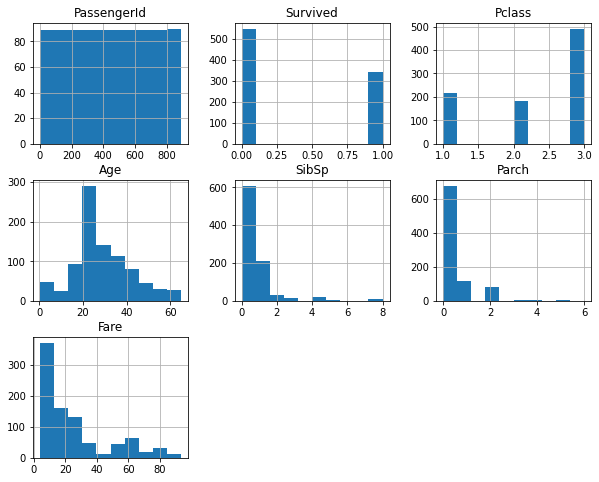

In [23]:
#Plotando distribuições estatísticas dos dados do Dataset Titanic
dataset_titanic.hist(figsize=(10, 8))

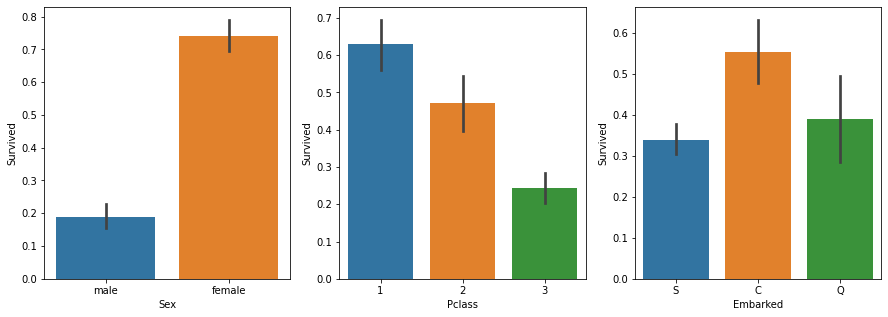

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
ax = sns.barplot(x='Sex', y='Survived', data=dataset_titanic)

plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=dataset_titanic)

plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=dataset_titanic)

# A partir dos gráficos podemos notar que a probabilidade de sobrevivência de um passageiro aumenta substancialmente se ele for do sexo feminino. Os passageiros da primeira classe (a mais cara)
# tem mais chances de sobrevivência que os demais e os da terceira classe tem menos da metade da chance de sobreviver que os da primeira. No terceiro gráfico vemos uma mais alta probabilidade
# de sobrevivência em quem embarcou em Cherbourg, isso ocorre pelo fato de que uma grande quantidade de passageiros da terceira classe embarcou em Southampton puxando o índice deste para baixo
# pois uma grande quantidade de pessoas da terceira classe não sobreviveu ao naufrágio.

In [40]:
print("Relação entre embarque e classe")
pd.crosstab([dataset_titanic.Embarked], dataset_titanic.Pclass)

Relação entre embarque e classe


Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


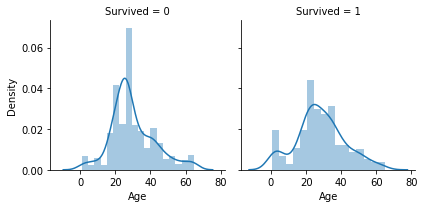

In [43]:
curvaIdadeSobreviventes = sns.FacetGrid(dataset_titanic, col='Survived')
curvaIdadeSobreviventes.map(sns.distplot, 'Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c8c70e90>,
      dtype=object)

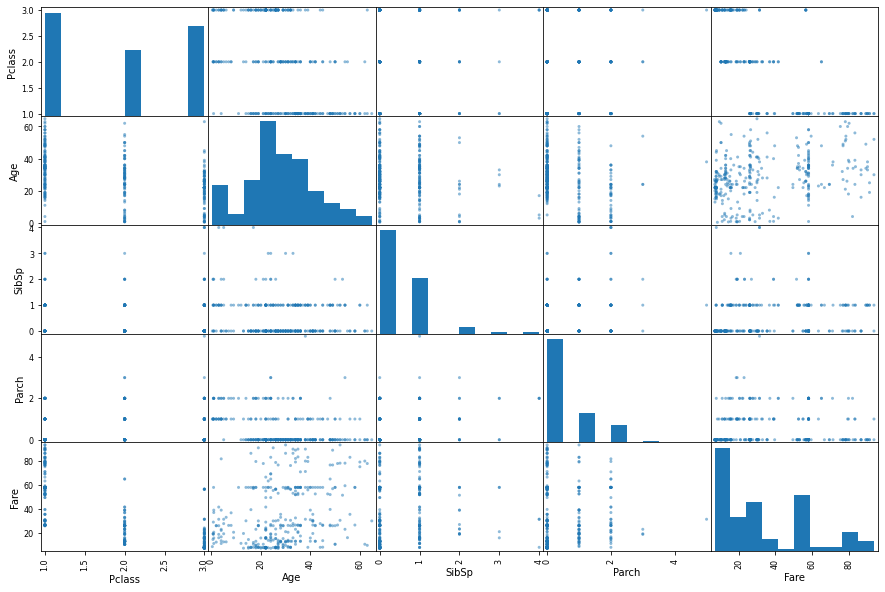

In [47]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
dataset_titanic_sobreviventes = dataset_titanic[dataset_titanic['Survived'] == 1]
pd.plotting.scatter_matrix(dataset_titanic_sobreviventes[columns], figsize=(15, 10))

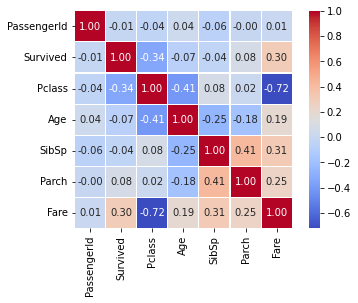

In [49]:
sns.heatmap(dataset_titanic.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, square=True, annot=True)